In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
sentiment_df=pd.read_csv("fear_greed_index.csv")

In [3]:
trades_df=pd.read_csv("historical_data.csv")

In [4]:
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [5]:
trades_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [6]:
print(sentiment_df.columns)
print(trades_df.columns)

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')
Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


In [7]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], errors='coerce')

In [8]:
sentiment_df = sentiment_df.dropna(subset=['date'])

In [9]:
sentiment_df['Date'] = sentiment_df['date'].dt.date

In [10]:
sentiment_df[['Date', 'classification']].head()

,Date,classification
0,2018-02-01,Fear
1,2018-02-02,Extreme Fear
2,2018-02-03,Fear
3,2018-02-04,Extreme Fear
4,2018-02-05,Extreme Fear


In [11]:
trades_df['Timestamp IST']=pd.to_datetime(trades_df['Timestamp IST'],errors='coerce')

In [12]:
trades_df = trades_df.dropna(subset=['Timestamp IST'])

In [13]:
trades_df['Date'] = trades_df['Timestamp IST'].dt.date


In [14]:
trades_df[['Date', 'Closed PnL', 'Size USD']].head()

,Date,Closed PnL,Size USD
0,2024-02-12,0.0,7872.16
1,2024-02-12,0.0,127.68
2,2024-02-12,0.0,1150.63
3,2024-02-12,0.0,1142.04
4,2024-02-12,0.0,69.75


In [15]:
print("Sentiment date range:")
print(sentiment_df['Date'].min(), "to", sentiment_df['Date'].max())

print("\nTrade date range:")
print(trades_df['Date'].min(), "to", trades_df['Date'].max())


Sentiment date range:
2018-02-01 to 2025-05-02

Trade date range:
2023-01-05 to 2025-12-04


In [16]:
merged_df = pd.merge(
    trades_df,
    sentiment_df[['Date', 'classification']],
    on='Date',
    how='inner'
)

print("Rows after merge:", len(merged_df))
merged_df.head()


Rows after merge: 35864


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,Greed


In [17]:
profit_by_sentiment=merged_df.groupby('classification')['Closed PnL'].mean()

In [18]:
profit_by_sentiment

,Closed PnL
classification,
Extreme Fear,1.891632
Extreme Greed,205.816345
Fear,128.287950
Greed,53.988003
Neutral,27.088803


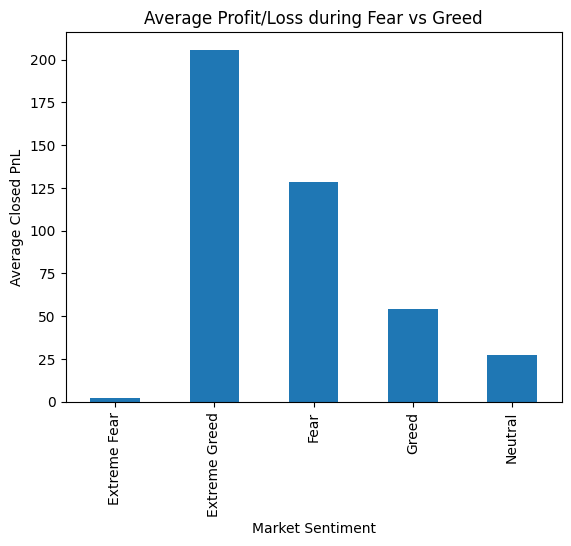

In [19]:
profit_by_sentiment.plot(kind='bar')
plt.title('Average Profit/Loss during Fear vs Greed')
plt.ylabel("Average Closed PnL")
plt.xlabel("Market Sentiment")
plt.show()

In [21]:
risk_by_sentiment=merged_df.groupby('classification')['Closed PnL'].std()
risk_by_sentiment


,Closed PnL
classification,
Extreme Fear,76.727713
Extreme Greed,1861.557119
Fear,1342.348497
Greed,1399.468182
Neutral,142.945889


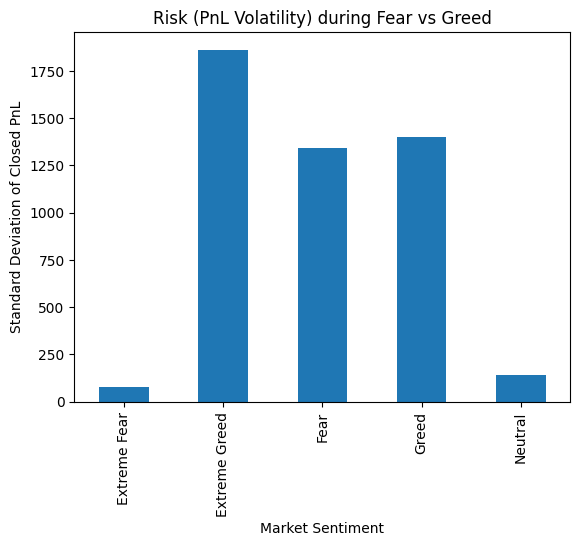

In [22]:
risk_by_sentiment.plot(kind='bar')
plt.title("Risk (PnL Volatility) during Fear vs Greed")
plt.ylabel("Standard Deviation of Closed PnL")
plt.xlabel("Market Sentiment")
plt.show()


In [23]:
volume_by_sentiment = merged_df.groupby('classification')['Size USD'].mean()
volume_by_sentiment


,Size USD
classification,
Extreme Fear,4118.761840
Extreme Greed,3242.085086
Fear,5744.782685
Greed,5051.878829
Neutral,4332.202906


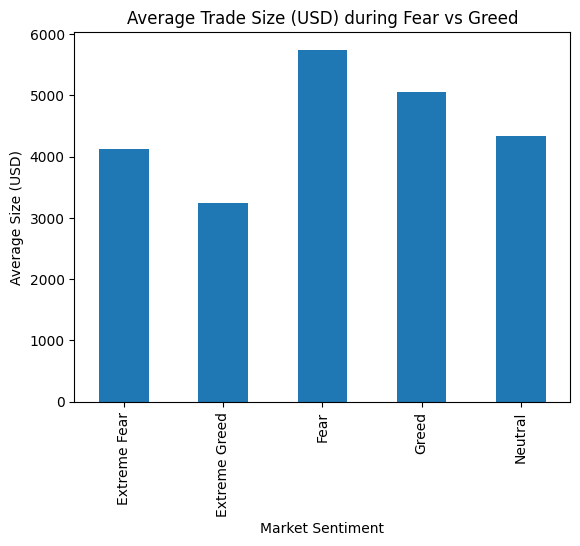

In [24]:
volume_by_sentiment.plot(kind='bar')
plt.title("Average Trade Size (USD) during Fear vs Greed")
plt.ylabel("Average Size (USD)")
plt.xlabel("Market Sentiment")
plt.show()


In [25]:
print(merged_df.columns)


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'Date', 'classification'],
      dtype='object')


In [26]:
merged_df['is_profit'] = merged_df['Closed PnL'] > 0

win_rate = merged_df.groupby('classification')['is_profit'].mean() * 100
win_rate


,is_profit
classification,
Extreme Fear,29.277730
Extreme Greed,55.328233
Fear,38.178672
Greed,43.570670
Neutral,49.492017


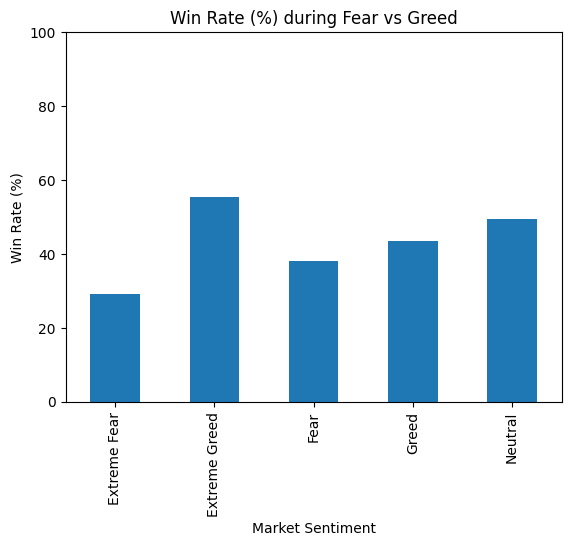

In [27]:
# Plot win rate
win_rate.plot(kind='bar')

plt.title("Win Rate (%) during Fear vs Greed")
plt.ylabel("Win Rate (%)")
plt.xlabel("Market Sentiment")
plt.ylim(0, 100)

plt.show()


In [28]:
loss_only = merged_df[merged_df['Closed PnL'] < 0]

avg_loss = loss_only.groupby('classification')['Closed PnL'].mean()
avg_loss


,Closed PnL
classification,
Extreme Fear,-66.312233
Extreme Greed,-463.177085
Fear,-215.936895
Greed,-413.498928
Neutral,-31.238223


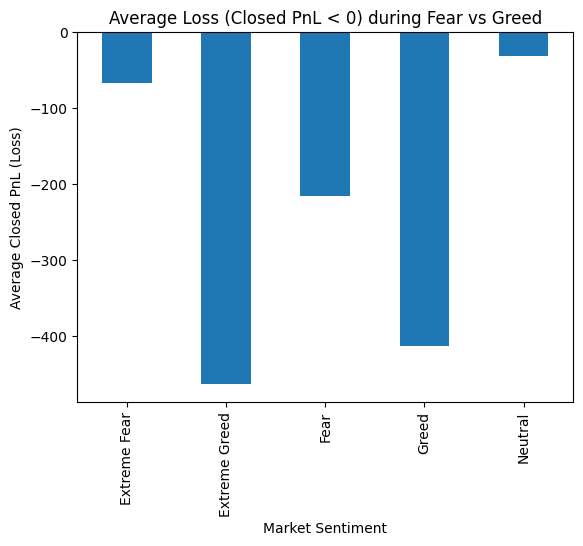

In [29]:
# Plot average loss
avg_loss.plot(kind='bar')

plt.title("Average Loss (Closed PnL < 0) during Fear vs Greed")
plt.ylabel("Average Closed PnL (Loss)")
plt.xlabel("Market Sentiment")

plt.show()



In [30]:
trade_count = merged_df.groupby('classification').size()
trade_count


,0
classification,
Extreme Fear,2326
Extreme Greed,5621
Fear,13869
Greed,11292
Neutral,2756


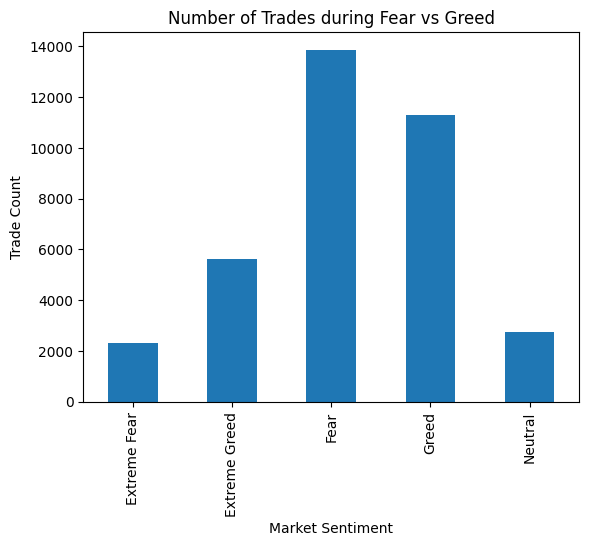

In [31]:
# Plot trade count
trade_count.plot(kind='bar')

plt.title("Number of Trades during Fear vs Greed")
plt.ylabel("Trade Count")
plt.xlabel("Market Sentiment")

plt.show()


In [32]:
direction_dist = merged_df.groupby(['classification', 'Direction']).size()
direction_dist


classification  Direction           
Extreme Fear    Buy                       77
                Close Long               673
                Close Short              106
                Open Long                984
                Open Short               441
                Sell                      43
                Short > Long               1
                Spot Dust Conversion       1
Extreme Greed   Buy                      469
                Close Long               606
                Close Short              640
                Long > Short               1
                Open Long                551
                Open Short              1164
                Sell                    2180
                Short > Long               1
                Spot Dust Conversion       9
Fear            Buy                     1003
                Close Long              2692
                Close Short             2752
                Long > Short               5
                Open Long               3548
                Open Short              3077
                Sell                     771
                Short > Long               4
                Spot Dust Conversion      17
Greed           Buy                     1514
                Close Long              2671
                Close Short             2063
                Long > Short              12
                Open Long               1818
                Open Short              2124
                Sell                    1069
                Short > Long              12
                Spot Dust Conversion       9
Neutral         Buy                      377
                Close Long               455
                Close Short              380
                Open Long                263
                Open Short               441
                Sell                     836
                Spot Dust Conversion       4
dtype: int64